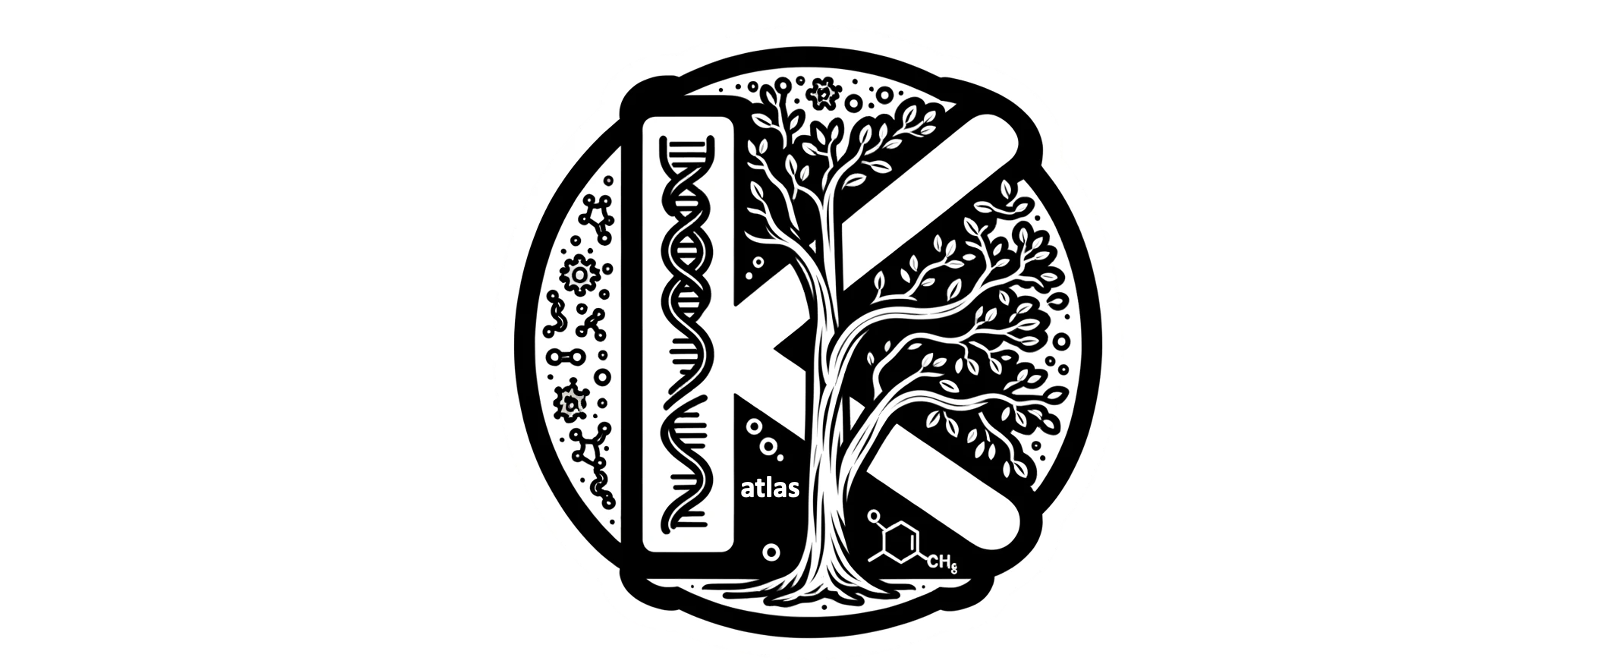

# Katlas

> Predict kinase given a substrate sequence

## Install

Install the latest version through git

In [ ]:
!pip install git+https://github.com/sky1ove/katlas.git -Uqq

Install from pip

In [ ]:
!pip install katlas -Uqq

## Import

In [ ]:
from katlas.core import *

# Quick start

***For a single input sequence***

In [ ]:
ref = Data.get_ks_main_upper()

In [ ]:
predict_kinase_string('AAAAAAASGGAGSDN',ref)

***For many input sequences***

In [ ]:
df = Data.get_ochoa_site()

In [ ]:
results = predict_kinase(df.head(),ref,'site_seq')

In [ ]:
results

# Tutorial

## Load reference

### All capital (recommend)
> for phosphorylation site sequence that are all capital

***Option1: reference derived from kinase-substrate dataset***

In [ ]:
ref = Data.get_ks_main_upper()

***Option2: reference from positional scanning peptide array (PSPA)***

ref = Data.get_pspa_main_upper()

***Option3: combined***

In [ ]:
ref = Data.get_combine_main_upper()

### With lower case (not recommend if the input string are all capital)
> for phosphorylation site sequence with lower case indicating phosphorylation status

Again, we have three options

In [ ]:
ref = Data.get_ks_main()

In [ ]:
ref = Data.get_pspa_main()

In [ ]:
ref = Data.get_combine_main()

Or from original normalized PSPA, which needs a different algorithm to calculate

In [ ]:
ref_original = Data.get_pspa_original()

## Load phosphorylation sites

***CPTAC pan-cancer phosphoproteomics***

In [ ]:
df = Data.get_cptac_ensembl_site()

***Ochoa et al. dataset from [paper]((https://www.nature.com/articles/s41587-019-0344-3))***

In [ ]:
df = Data.get_ochoa_site()

***PhosphoSitePlus***

In [ ]:
df = Data.get_pplus_human_site()

***Your customized csv file***
> with 'site_seq' as the column name of the site and 'gene_site' as the site id

In [ ]:
df = pd.read_csv('your_file.csv')

```
!!! Since all of the sites in the three datasets are all capital, strongly recommend using all capital reference 
```

### Get unique site

Since there are duplicated phosphorylation site sequences in the above datasets, we can get unique phosphorylation site through this function

In [ ]:
unique = get_unique_site(df)

## Predict kinase based on site sequence

***Predict directly from site sequence***

To replicate PSP kinase library prediction

In [ ]:
predict_kinase_string('AAAAAAAsGGAGSDN',ref_original,multiply)

In our case

In [ ]:
predict_kinase_string('AAAAAAAsGGAGSDN',ref)

***Predict lots of site sequences from a dataframe***

In [ ]:
results = predict_kinase(df,ref,seq_col='site_seq',seq_id='gene_site')

## Site format

### Examples

***All capital - 15 length (-7 to +7)***

- QSEEEKLSPSPTTED
- TLQHVPDYRQNVYIP
- TMGLSARYGPQFTLQ

***All capital - 10 length (-5 to +4)***

- SRDPHYQDPH
- LDNPDYQQDF
- AAAAASGGAG

***With lowercase - 15 length***

- QsEEEKLsPsPTTED
- TLQHVPDyRQNVYIP
- TMGLsARyGPQFTLQ

***With lowercase - 10 length***

- sRDPHyQDPH
- LDNPDyQQDF
- AAAAAsGGAG

### Length

Either 15 (-7 to +7) or 10 (-5 to +4)

### Acceptor (position 0 )

S, T or Y